In [2]:
# You must install this system library to make pylibdmtx work
# sudo apt-get install libdmtx0b

In [3]:
from PIL import Image
import pylibdmtx.pylibdmtx
import albumentations
import numpy as np
import pandas as pd
import os

# First exploration

In [4]:
encoded = pylibdmtx.pylibdmtx.encode('Some new example. Second example.'.encode('utf8'))
img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img.save('pictures/dmtx.png')
decoded = pylibdmtx.pylibdmtx.decode(Image.open('pictures/dmtx.png'))
decoded[0].data.decode("utf8")

'Some new example. Second example.'

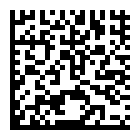

In [5]:
img

In [6]:
im_array = np.array(img)
for i in range(9):
    im_array[50][i] = [0, 0, 0]

In [7]:
pylibdmtx.pylibdmtx.decode(np.array(img))

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

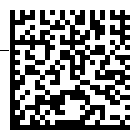

In [8]:
img2 = Image.fromarray(im_array)
img2

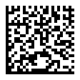

In [11]:
img_res = img.resize(size=(80,80))
img_res

In [12]:
pylibdmtx.pylibdmtx.decode(img_res)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=5, top=5, width=69, height=69))]

In [ ]:
np.sum(np.asarray(img) == np.asarray(img2))

58773

In [ ]:
pylibdmtx.pylibdmtx.decode(img2)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=8, top=10, width=121, height=119))]

In [ ]:
pylibdmtx.pylibdmtx.decode(img)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [ ]:
pylibdmtx.pylibdmtx.decode(img)[0].data.decode("utf8")

'Some new example. Second example.'

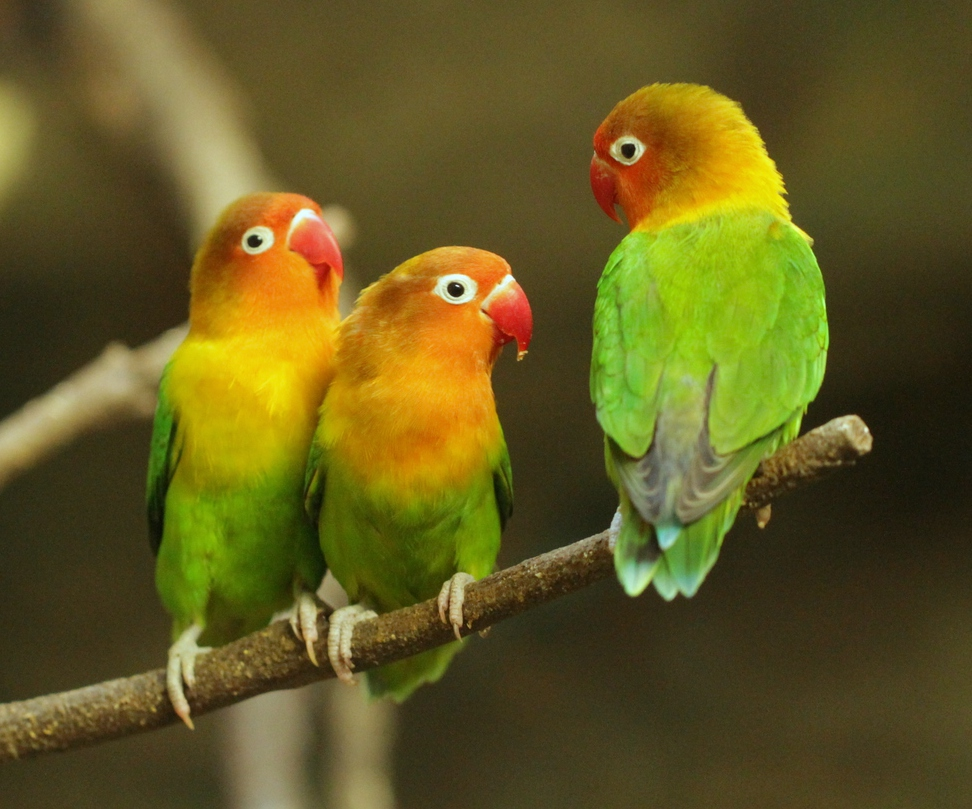

In [ ]:
image = Image.open("pictures/parrot.jpg")
image

In [ ]:
transform = albumentations.Compose([
    albumentations.RandomCrop(width=256, height=256),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.RandomBrightnessContrast(p=0.2),
])

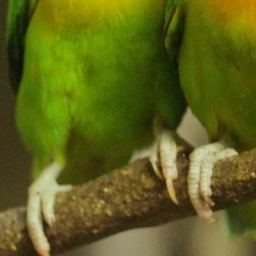

In [ ]:
transformed = transform(image=np.array(image))
transformed_image = transformed["image"]
Image.fromarray(transformed_image)

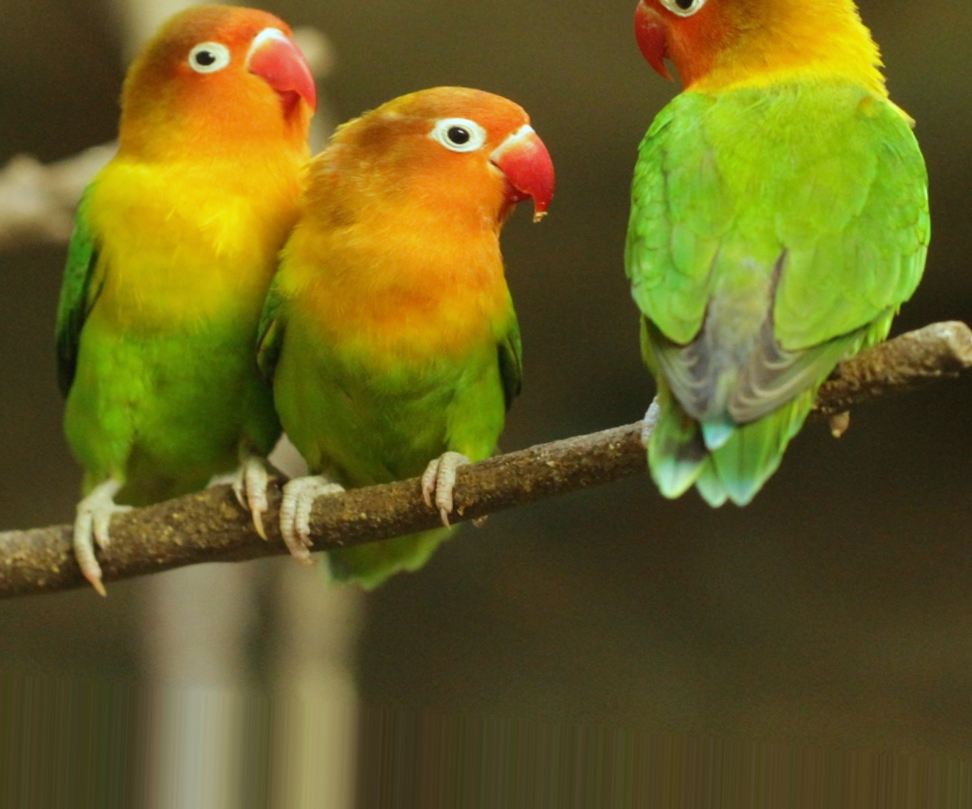

In [ ]:
el_transform = albumentations.ElasticTransform(always_apply=True, alpha_affine=200, border_mode=1)
el_transformed = el_transform(image=np.array(image))
el_transformed_image = el_transformed["image"]
Image.fromarray(el_transformed_image)

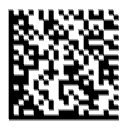

In [ ]:
blur_transform = albumentations.MotionBlur(always_apply=True)
blur_transformed = blur_transform(image=np.array(img))
blur_transformed_image = blur_transformed["image"]
Image.fromarray(blur_transformed_image)

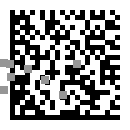

In [ ]:
drop_transform = albumentations.CoarseDropout(always_apply=True, fill_value=150)
drop_transformed = drop_transform(image=np.array(img))
drop_transformed_image = drop_transformed["image"]
Image.fromarray(drop_transformed_image)

# Network

In [ ]:
import conv_ae
import datamatrix_provider as dmp

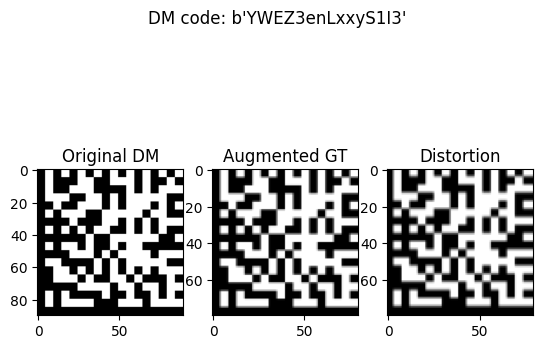

In [ ]:
dm_provider_example = dmp.DataMatrixProvider(visualize=True)
dm_generate_example, dm_size_example, dm_mode_example, dm_mode_opts_example, dm_const_example = dm_provider_example.init_dm_provider(library="pylibdmtx", pylibdmtx_params={})
dm_clean_example, dm_augm_example, dm_text_example = dm_generate_example()

In [ ]:
type(dm_clean_example)

numpy.ndarray

In [ ]:
str(dm_text_example)

"b'wpwq'"

In [ ]:
type(dm_text_example.decode("utf8"))

str